**to predict a person is vacinate or not**

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_row",None)
pd.set_option("display.max_Columns",None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
sns.set_theme(palette='tab10',font='Lucida calligraphy',font_scale=1.0,)
import matplotlib
matplotlib.rcParams.update({'font.size':10})
plt.style.use('dark_background')

In [4]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")


In [5]:
df.sample(10).style.background_gradient(cmap='Accent')


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
22388,22388,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,1.000000,4.000000,4.000000,1.000000,45 - 54 Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",0.000000,0.000000,1
15568,15568,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,nan,5.000000,2.000000,2.000000,4.000000,2.000000,1.000000,55 - 64 Years,Some College,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",1.000000,1.000000,0
15223,15223,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,nan,3.000000,3.000000,1.000000,4.000000,4.000000,1.000000,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.000000,0.000000,0
20474,20474,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1.000000,2.000000,3.000000,1.000000,4.000000,55 - 64 Years,College Graduate,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.000000,0.000000,0
15709,15709,1.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,4.000000,1.000000,1.000000,18 - 34 Years,12 Years,White,Male,Below Poverty,Married,Own,Not in Labor Force,"MSA, Principle City",1.000000,3.000000,0
11207,11207,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,nan,3.000000,1.000000,1.000000,3.000000,3.000000,2.000000,35 - 44 Years,12 Years,White,Male,"> $75,000",Married,Own,Unemployed,"MSA, Principle City",1.000000,0.000000,0
5455,5455,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,4.000000,4.000000,1.000000,45 - 54 Years,12 Years,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.000000,0.000000,0
12100,12100,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,nan,4.000000,4.000000,2.000000,4.000000,4.000000,1.000000,45 - 54 Years,College Graduate,White,Female,"> $75,000",Not Married,Own,Employed,"MSA, Not Principle City",0.000000,0.000000,0
15888,15888,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,nan,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,45 - 54 Years,Some College,Black,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.000000,0.000000,0
14118,14118,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,45 - 54 Years,College Graduate,White,Male,nan,Not Married,Own,Employed,"MSA, Principle City",2.000000,1.000000,0


In [6]:
df.shape

(26707, 34)

In [7]:
df.describe().style.background_gradient(cmap='rainbow')

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.000000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.000000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.358640,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.879720,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.479610,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.325300,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [8]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

**Data clanning**

In [9]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<Axes: >

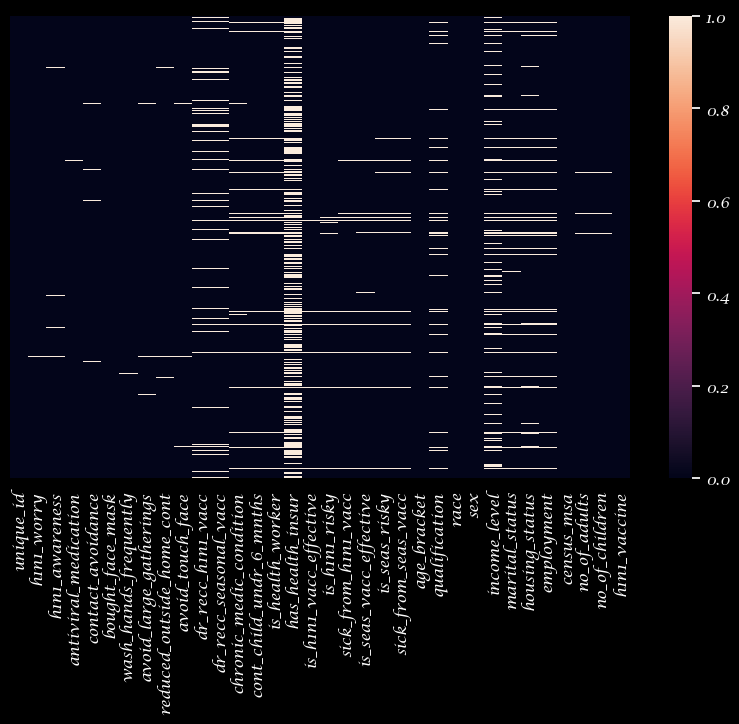

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

In [11]:
mode1=df["employment"].mode().values[0]
mode2=df["marital_status"].mode().values[0]
mode3=df["employment"].mode().values[0]

In [12]:
df["employment"]=df["employment"].replace(np.nan,mode1)
df["marital_status"]=df["marital_status"].replace(np.nan,mode2)
df["employment"]=df["employment"].replace(np.nan,mode3)

In [13]:
median1=df["h1n1_awareness"].median()
median2=df["antiviral_medication"].median()
median3=df["contact_avoidance"].median()
median4=df["bought_face_mask"].median()
median5=df["wash_hands_frequently"].median()
median6=df["avoid_large_gatherings"].median()
median7=df["reduced_outside_home_cont"].median()
median8=df["chronic_medic_condition"].median()
median9=df["is_health_worker"].median()
median10=df["is_h1n1_vacc_effective"].median()
median11=df["is_h1n1_risky"].median()
median12=df["sick_from_h1n1_vacc"].median()
median13=df["is_seas_vacc_effective"].median()
median14=df["is_seas_risky"].median()
median15=df["sick_from_seas_vacc"].median()
median16=df["dr_recc_h1n1_vacc"].median()
median17=df["dr_recc_seasonal_vacc"].median()

In [14]:
df["h1n1_awareness"]=df["h1n1_awareness"].replace(np.nan,median1)
df["antiviral_medicationantiviral_medication"]=df["antiviral_medication"].replace(np.nan,median2)
df["contact_avoidance"]=df["contact_avoidance"].replace(np.nan,median3)
df["bought_face_mask"]=df["bought_face_mask"].replace(np.nan,median4)
df["wash_hands_frequently"]=df["wash_hands_frequently"].replace(np.nan,median5)
df["avoid_large_gatherings"]=df["avoid_large_gatherings"].replace(np.nan,median6)
df["reduced_outside_home_cont"]=df["reduced_outside_home_cont"].replace(np.nan,median7)
df["chronic_medic_condition"]=df["chronic_medic_condition"].replace(np.nan,median8)
df["is_health_worker"]=df["is_health_worker"].replace(np.nan,median9)
df["is_h1n1_vacc_effective"]=df["is_h1n1_vacc_effective"].replace(np.nan,median10)
df["is_h1n1_risky"]=df["is_h1n1_risky"].replace(np.nan,median11)
df["sick_from_h1n1_vacc"]=df["sick_from_h1n1_vacc"].replace(np.nan,median12)
df["is_seas_vacc_effective"]=df["is_seas_vacc_effective"].replace(np.nan,median13)
df["is_seas_risky"]=df["is_seas_risky"].replace(np.nan,median14)
df["sick_from_seas_vacc"]=df["sick_from_seas_vacc"].replace(np.nan,median15)
df["dr_recc_h1n1_vacc"]=df["dr_recc_h1n1_vacc"].replace(np.nan,median16)
df["dr_recc_seasonal_vacc"]=df["dr_recc_seasonal_vacc"].replace(np.nan,median17)

In [15]:
df=df.drop(["census_msa","no_of_adults","no_of_children","housing_status","income_level","qualification","has_health_insur","age_bracket","cont_child_undr_6_mnths","h1n1_worry","avoid_touch_face","cont_child_undr_6_mnths"],axis=1)

<Axes: >

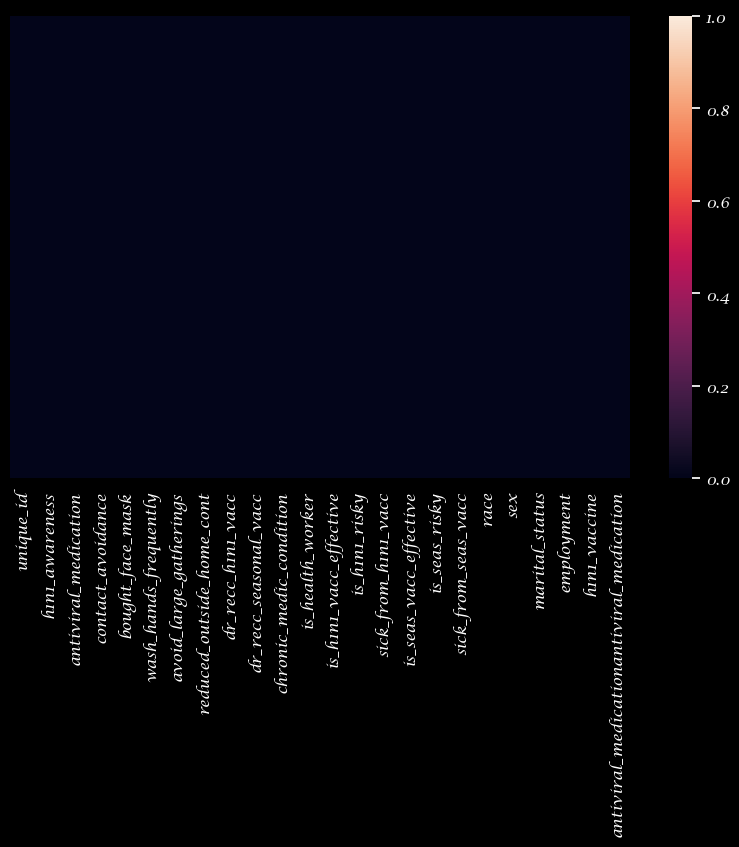

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),yticklabels=False)

**Visulation**

In [17]:
categorical=["race","sex","marital_status","employment"]

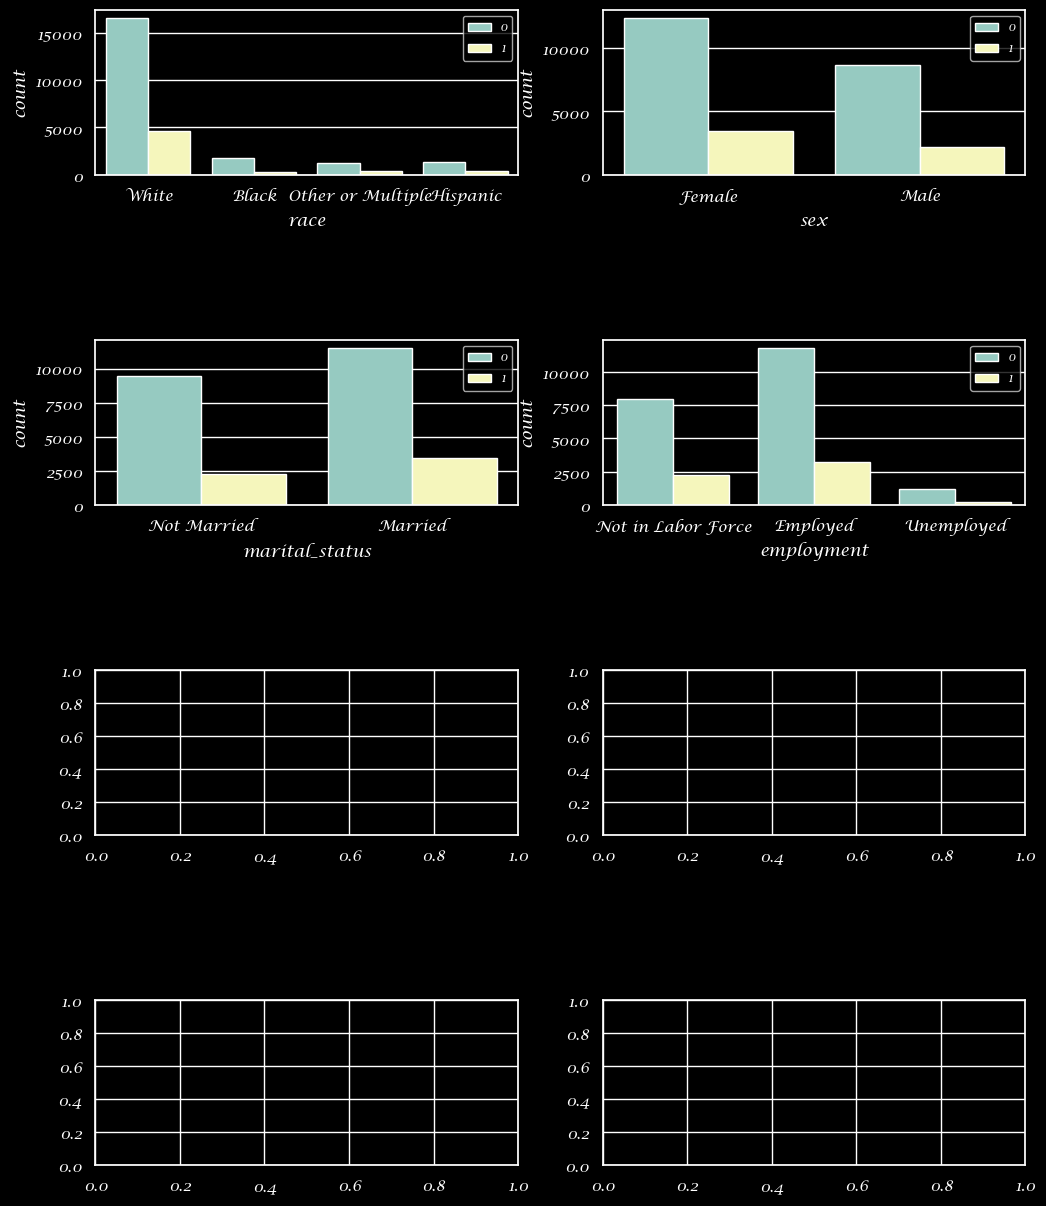

In [18]:
fig,axes = plt.subplots(4,2, figsize=(12,15))

for idx,cat_col in enumerate(categorical):
    row, col = idx // 2,idx % 2
    sns.countplot(x=cat_col,data=df, hue='h1n1_vaccine', ax=axes[row,col])
    axes[row,col].legend(fontsize='small')
    
plt.subplots_adjust(hspace=1)
plt.show()

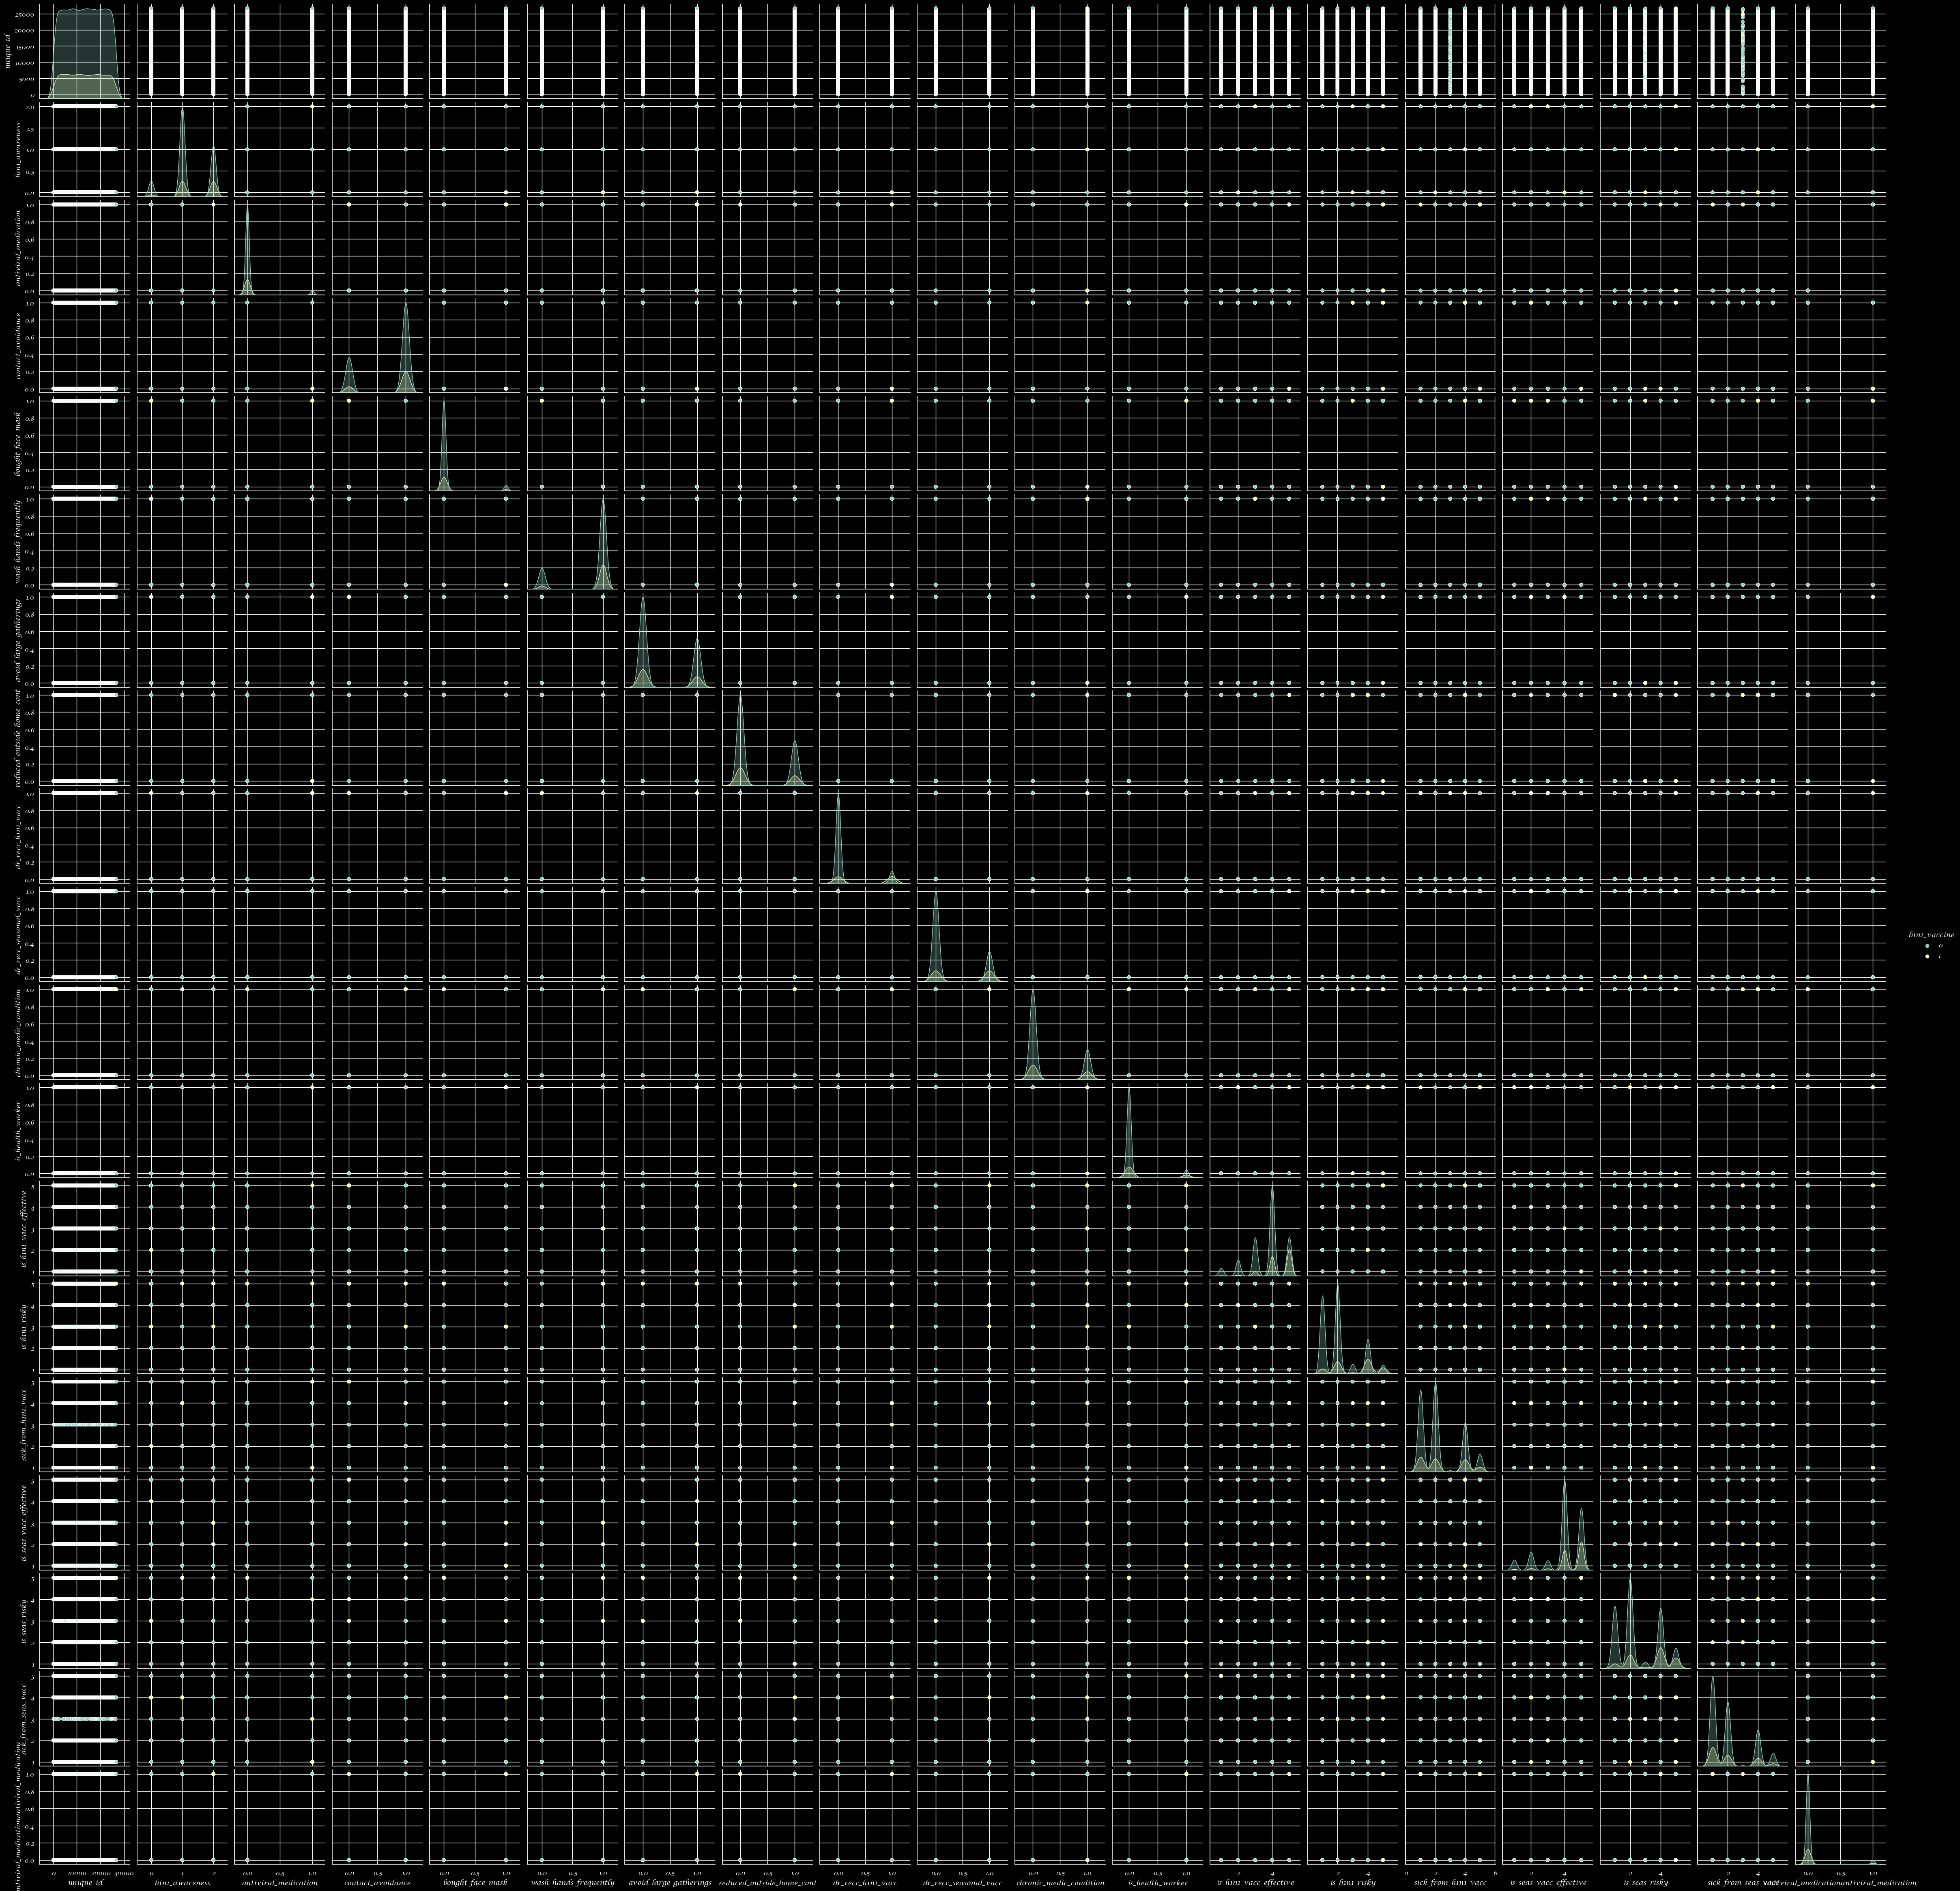

In [19]:
sns.pairplot(df,hue="h1n1_vaccine")

In [20]:
df.head(10)

,unique_id,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,race,sex,marital_status,employment,h1n1_vaccine,antiviral_medicationantiviral_medication
0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,White,Female,Not Married,Not in Labor Force,0,0.0
1,1,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,White,Male,Not Married,Employed,0,0.0
2,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,White,Male,Not Married,Employed,0,0.0
3,3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,White,Female,Not Married,Not in Labor Force,0,0.0
4,4,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,White,Female,Married,Employed,0,0.0
5,5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,2.0,1.0,5.0,4.0,4.0,White,Male,Married,Employed,0,0.0
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,2.0,1.0,White,Male,Not Married,Employed,0,0.0
7,7,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,2.0,1.0,4.0,2.0,1.0,White,Female,Married,Employed,1,0.0
8,8,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,2.0,1.0,White,Male,Married,Employed,0,0.0
9,9,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,2.0,4.0,2.0,2.0,White,Male,Not Married,Not in Labor Force,0,0.0


**Encoding**

In [21]:
df=pd.get_dummies(df,columns=["sex","race","marital_status","employment"])

In [22]:
df.sample(10)

,unique_id,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,is_health_worker,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,h1n1_vaccine,antiviral_medicationantiviral_medication,sex_Female,sex_Male,race_Black,race_Hispanic,race_Other or Multiple,race_White,marital_status_Married,marital_status_Not Married,employment_Employed,employment_Not in Labor Force,employment_Unemployed
19376,19376,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,1.0,5.0,4.0,1.0,0,0.0,True,False,False,False,False,True,False,True,True,False,False
21798,21798,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,4.0,4.0,5.0,4.0,4.0,1,1.0,True,False,False,False,False,True,False,True,False,False,True
8430,8430,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,2.0,3.0,4.0,4.0,2.0,0,0.0,True,False,False,False,False,True,False,True,False,True,False
22538,22538,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,1.0,2.0,0,0.0,False,True,False,False,False,True,True,False,True,False,False
14016,14016,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,2.0,2.0,0,0.0,True,False,True,False,False,False,True,False,True,False,False
2978,2978,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,1.0,2.0,1.0,1.0,0,0.0,False,True,False,True,False,False,False,True,True,False,False
23050,23050,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,4.0,2.0,2.0,4.0,2.0,2.0,0,0.0,False,True,False,False,False,True,True,False,True,False,False
15304,15304,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,2.0,5.0,4.0,1.0,0,0.0,True,False,False,False,False,True,False,True,False,True,False
6746,6746,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,4.0,5.0,5.0,5.0,0,0.0,False,True,False,False,False,True,True,False,False,True,False
19777,19777,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,2.0,4.0,1.0,4.0,0,0.0,True,False,False,False,False,True,True,False,True,False,False


Starting machine learning algroithm

In [23]:
x=df.drop(["h1n1_vaccine","unique_id"],axis=1)
y=df["h1n1_vaccine"]


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

**LogisticRegression**

In [25]:
model_logr=LogisticRegression()

In [26]:

imputer = SimpleImputer(strategy='mean')
x_train_ = imputer.fit_transform(x_train)
x_test_ = imputer.transform(x_test)

In [27]:
model_logr.fit(x_train_,y_train)

LogisticRegression()

In [28]:
model_logr.score(x_train_,y_train)

0.8311757783245961

In [29]:
model_logr.score(x_test_,y_test)

0.8372644452764259

**DessionTreeClassification**

In [30]:
model_dtc=DecisionTreeClassifier(max_depth=9)

In [31]:
model_dtc.fit(x_train_,y_train)

DecisionTreeClassifier(max_depth=9)

In [32]:
model_dtc.score(x_train_,y_train)

0.8520915801861559

In [33]:
model_dtc.score(x_test_,y_test)

0.8272806689130163

**Baggingclaassification**

In [34]:
model_bggc=BaggingClassifier()

In [35]:
model_bggc.fit(x_train_,y_train)

BaggingClassifier()

In [36]:
model_bggc.score(x_train_,y_train)

0.9742163260939339

In [37]:
model_bggc.score(x_test_,y_test)

0.8115562211406464

**AdaBoostClassification**

In [38]:
model_addc=AdaBoostClassifier()

In [39]:
model_addc.fit(x_train_,y_train)

AdaBoostClassifier()

In [40]:
model_addc.score(x_train_,y_train)

0.8296244784422809

In [41]:
model_addc.score(x_test_,y_test)

0.8381380257082242

**GradientBoostingClassification**

In [42]:
from sklearn.ensemble import GradientBoostingClassifier

In [43]:
model_gbc=GradientBoostingClassifier()

In [44]:
model_gbc.fit(x_train_,y_train)

GradientBoostingClassifier()

In [45]:
model_gbc.score(x_train_,y_train)

0.8370065261581257

In [46]:
model_gbc.score(x_test_,y_test)

0.8421315362535879

**RandomForestClassification**

In [47]:
model_rfc=RandomForestClassifier(n_estimators=100,criterion='gini', max_depth=7)

In [48]:
model_rfc.fit(x_train_,y_train)

RandomForestClassifier(max_depth=7)

In [49]:
model_rfc.score(x_train_,y_train)


0.8370600192575158

In [50]:
model_rfc.score(x_test_,y_test)

0.8370148508673406

**Support_Vector_Machine_Classification**

In [51]:
model_svc=SVC(kernel='poly')

In [52]:
model_svc.fit(x_train_,y_train)

SVC(kernel='poly')

In [53]:
model_svc.score(x_train_,y_train)

0.8321386541136193

In [54]:
model_svc.score(x_test_,y_test)

0.8352676900037439